In [ ]:
!pip install pycountry_convert

     |████████████████████████████████| 10.1MB 8.2MB/s 
     |████████████████████████████████| 235kB 43.2MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746865 sha256=7cd134f0771b121cfd913d7b9f9563e776a7a52856ac6f1bfefbb186cdd7a68c
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.2.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 5.2.1 which is incompatible.
ERROR: pytest-cov 2.10.1 has requirement pytest>=4.6, but you'll have pytest 3.6.4 which is incompatible.
ERROR: pytest-mock 3.3.1 has requirement pytest>=5.0, but you'll have pytest 3.6.4 which is incompatible.
  Found existing installation: coverage 3

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pycountry_convert as pc

In [ ]:
org_confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
org_deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
org_recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [ ]:
df_confirmed = org_confirmed_df.drop(['Province/State', 'Lat', 'Long'], axis=1)
df_confirmed.index = df_confirmed['Country/Region']
df_confirmed = df_confirmed.drop(['Country/Region'], axis=1).groupby('Country/Region').sum()

df_deaths = org_deaths_df.drop(['Province/State', 'Lat', 'Long'], axis=1)
df_deaths.index = df_deaths['Country/Region']
df_deaths = df_deaths.drop(['Country/Region'], axis=1).groupby('Country/Region').sum()

df_recovered = org_recovered_df.drop(['Province/State', 'Lat', 'Long'], axis=1)
df_recovered.index = df_recovered['Country/Region']
df_recovered = df_recovered.drop(['Country/Region'], axis=1).groupby('Country/Region').sum()

In [ ]:
print(df_confirmed)

                   continent  1/22/20  1/23/20  ...  9/5/20  9/6/20  9/7/20
Country/Region                                  ...                        
Afghanistan             Asia        0        0  ...   38324   38398   38494
Albania               Europe        0        0  ...   10102   10255   10406
Algeria               Africa        0        0  ...   46071   46364   46653
Andorra               Europe        0        0  ...    1215    1215    1261
Angola                Africa        0        0  ...    2935    2965    2981
...                      ...      ...      ...  ...     ...     ...     ...
West Bank and Gaza    Others        0        0  ...   25575   26127   26779
Western Sahara        Others        0        0  ...      10      10      10
Yemen                   Asia        0        0  ...    1983    1987    1989
Zambia                Africa        0        0  ...   12709   12776   12836
Zimbabwe              Africa        0        0  ...    6837    6837    7298

[188 rows x

In [ ]:
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'

continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe',
    'na': 'Others'
}

In [ ]:
df_confirmed.insert(0, "continent", [continents[country_to_continent_code(country)] for country in df_confirmed.index])
df_deaths.insert(0, "continent", [continents[country_to_continent_code(country)] for country in df_deaths.index])
df_recovered.insert(0, "continent", [continents[country_to_continent_code(country)] for country in df_recovered.index])

In [ ]:
# confirmed_data_df = confirmed_df[confirmed_df.columns[4:]]
confirmed_data_df = confirmed_df.iloc[:, 4:] #.append(confirmed_world, ignore_index=True)
print(confirmed_data_df.shape)

deaths_data_df = deaths_df.iloc[:, 4:] #.append(deaths_world, ignore_index=True)
print(deaths_data_df.shape)

recovered_data_df = recovered_df.iloc[:, 4:] #.append(recovered_world, ignore_index=True)
print(recovered_data_df.shape)

In [ ]:
confirmed_world = confirmed_data_df.sum()
print('Total Cases Worldwide:')
print(confirmed_world)

deaths_world = deaths_data_df.sum()
print('Total Deaths Worldwide:')
print(deaths_world)

recovered_world = recovered_data_df.sum()
print('Total Recovered Worldwide:')
print(recovered_world)

In [ ]:
countries = ['Iran', 'Japan', 'China', 'Vietnam']

In [ ]:
row_idx_dict = {cname: (confirmed_df.index[confirmed_df['Country/Region']==cname][0],
                        deaths_data_df.index[deaths_df['Country/Region']==cname][0],
                        recovered_data_df.index[recovered_df['Country/Region']==cname][0])
                for cname in countries}
row_idx_dict['World'] = (confirmed_data_df.shape[0], deaths_data_df.shape[0], recovered_data_df.shape[0])
print(row_idx_dict)

In [ ]:
# days_count = confirmed_data_df.shape[1]
days_count = df_confirmed.shape[1] - 1
print(days_count)
# X = np.arange(days_count).reshape(-1, 1)

232


In [ ]:
start_day = '8/1/20'
start_day_idx = confirmed_data_df.columns.get_loc(start_day)
print(start_day_idx)
X_train = np.arange(start_day_idx).reshape(-1, 1)
X_test = np.arange(start_day_idx, days_count).reshape(-1, 1)

NameError: ignored

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# dfs = [('Total Cases', confirmed_data_df.append(confirmed_world, ignore_index=True)),
#        ('Total Deaths', deaths_data_df.append(deaths_world, ignore_index=True)),
#        ('Total Recovered', recovered_data_df.append(recovered_world, ignore_index=True))]
dfs = [('Total Cases', df_confirmed),
       ('Total Deaths', df_deaths),
       ('Total Recovered', df_recovered)]

In [ ]:
# TODO: fill in these lists
unaggregated_countries = ['China']
mother_countries = []
# def get_country_data(cname, source_df, start_date_idx=0, end_date_idx):
#   if cname == 'World':
#     return source_df.sum()
#   elif cname in unaggregated_countries:
#     pass
#   elif cname in mother_countries:
#     pass
#   else:
#     pass

# col_names = df_confirmed.keys()
days_count = df_confirmed.shape[1]
def get_country_data(df, cname, start_date_idx=0, end_date_idx=days_count):
  if cname == 'World':
    return df.sum() #.to_numpy().flatten()
  else:
    return df.loc[[cname], :].iloc[:, start_date_idx:end_date_idx] #.to_numpy().flatten(), list(col_names[start_date_idx:end_date_idx])

In [ ]:
print(dfs[0][1].loc[row_idx_dict['World'][0]])

In [ ]:
print(df_confirmed.loc[['China'], :])
print(type(df_confirmed.loc[['China'], :]))

                1/22/20  1/23/20  1/24/20  ...  9/3/20  9/4/20  9/5/20
Country/Region                             ...                        
China               548      643      920  ...   89986   90008   90025

[1 rows x 228 columns]
<class 'pandas.core.frame.DataFrame'>


In [ ]:
df_confirmed.loc['China'][1:]

1/22/20      548
1/23/20      643
1/24/20      920
1/25/20     1406
1/26/20     2075
           ...  
9/3/20     89986
9/4/20     90008
9/5/20     90025
9/6/20     90058
9/7/20     90078
Name: China, Length: 230, dtype: object

In [ ]:
df_confirmed.groupby('continent').sum()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20
continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,2,2,2,3,3,4,...,916701,929252,939703,949500,964743,978847,992195,1006199,1018442,1027379,1035199,1044336,1054671,1067152,1078822,1088625,1097407,1106000,1116799,1127370,1137518,1147783,1156807,1164143,1171652,1180374,1188861,1196726,1205094,1213458,1220092,1227206,1235203,1242892,1251385,1258545,1266220,1272697,1280207,1288433
Asia,552,651,932,1424,2098,2903,5546,6131,8195,9868,11969,16713,19802,23809,27549,30698,34224,36948,39970,42506,44543,44920,60071,66553,68627,70738,72669,74462,74881,75352,75858,77348,77400,77654,78252,78766,79353,79857,80532,81544,...,4347572,4424947,4499016,4577763,4661423,4750137,4838726,4928927,5013805,5094774,5180049,5273453,5364565,5457708,5548075,5629602,5707124,5799338,5895954,5991695,6087081,6181464,6263894,6349341,6430815,6542966,6645522,6747457,6850571,6952142,7045957,7147770,7257070,7367459,7480744,7596175,7711100,7811129,7928661,8052490
Australia,0,0,0,0,4,5,5,6,9,9,12,12,12,13,13,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,16,26,28,...,19578,20022,20435,21155,21639,22031,22482,22868,23207,23524,23938,24261,24643,24943,25208,25540,25777,26013,26265,26461,26662,26874,27027,27172,27346,27471,27614,27755,27880,27971,28058,28169,28308,28400,28482,28569,28625,28683,28787,28852
Europe,0,0,2,3,3,4,8,10,10,17,23,25,33,34,35,35,37,46,49,49,52,53,54,55,56,56,57,57,58,60,78,120,218,294,402,565,830,1134,1506,2261,...,2874092,2886711,2908070,2930765,2949172,2972043,2997063,3011925,3025515,3052353,3070461,3095787,3120317,3149840,3169598,3183485,3216996,3237647,3261744,3287046,3329485,3350850,3370917,3407680,3434445,3465674,3500301,3535261,3553406,3580656,3623627,3653142,3688672,3725585,3767186,3788071,3807416,3873967,3910910,3952936
North America,0,0,0,0,1,1,2,2,2,4,4,4,4,4,5,5,7,7,7,7,7,7,7,7,7,7,8,8,8,8,9,9,9,10,11,11,13,15,24,30,...,835250,844365,852979,864465,876250,887988,900695,912494,920854,930776,942361,953131,966266,977523,989238,997983,1004731,1014561,1025721,1036675,1047832,1059243,1067663,1075438,1085221,1095394,1106791,1118145,1128841,1135745,1144886,1155618,1165499,1176908,1187296,1199609,1206777,1214249,1225159,1234679
Others,3,3,7,7,12,14,17,17,18,28,30,33,36,38,41,50,112,113,118,191,193,233,234,277,344,417,519,608,688,775,879,1108,1336,1569,1714,2013,2519,3092,3918,4511,...,4685209,4733749,4780048,4838197,4891477,4952091,5011028,5067650,5115005,5165545,5212915,5269524,5321958,5387163,5435911,5478697,5514478,5560629,5607792,5652560,5702605,5747845,5783417,5822199,5861528,5906693,5953677,6000945,6049030,6085270,6120464,6164616,6205869,6243343,6294830,6340264,6372579,6398123,6425676,6460914
South America,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,3,3,3,4,17,...,4169172,4237672,4278527,4355679,4444050,4530764,4612623,4684479,4741964,4791929,4876184,4957682,5051703,5144145,5209974,5265444,5311958,5390491,5473937,5553522,5614867,5697504,5747781,5797881,5874878,5955174,6030178,6108159,6181634,6227467,6301683,6373121,6450789,6520269,6608048,6670314,6711128,6738912,6771342,6845429


In [ ]:
print(get_country_data(df_confirmed, 'China', start_date_idx=-100, end_date_idx=-10))

NameError: ignored

(132, 1)
(90, 1)


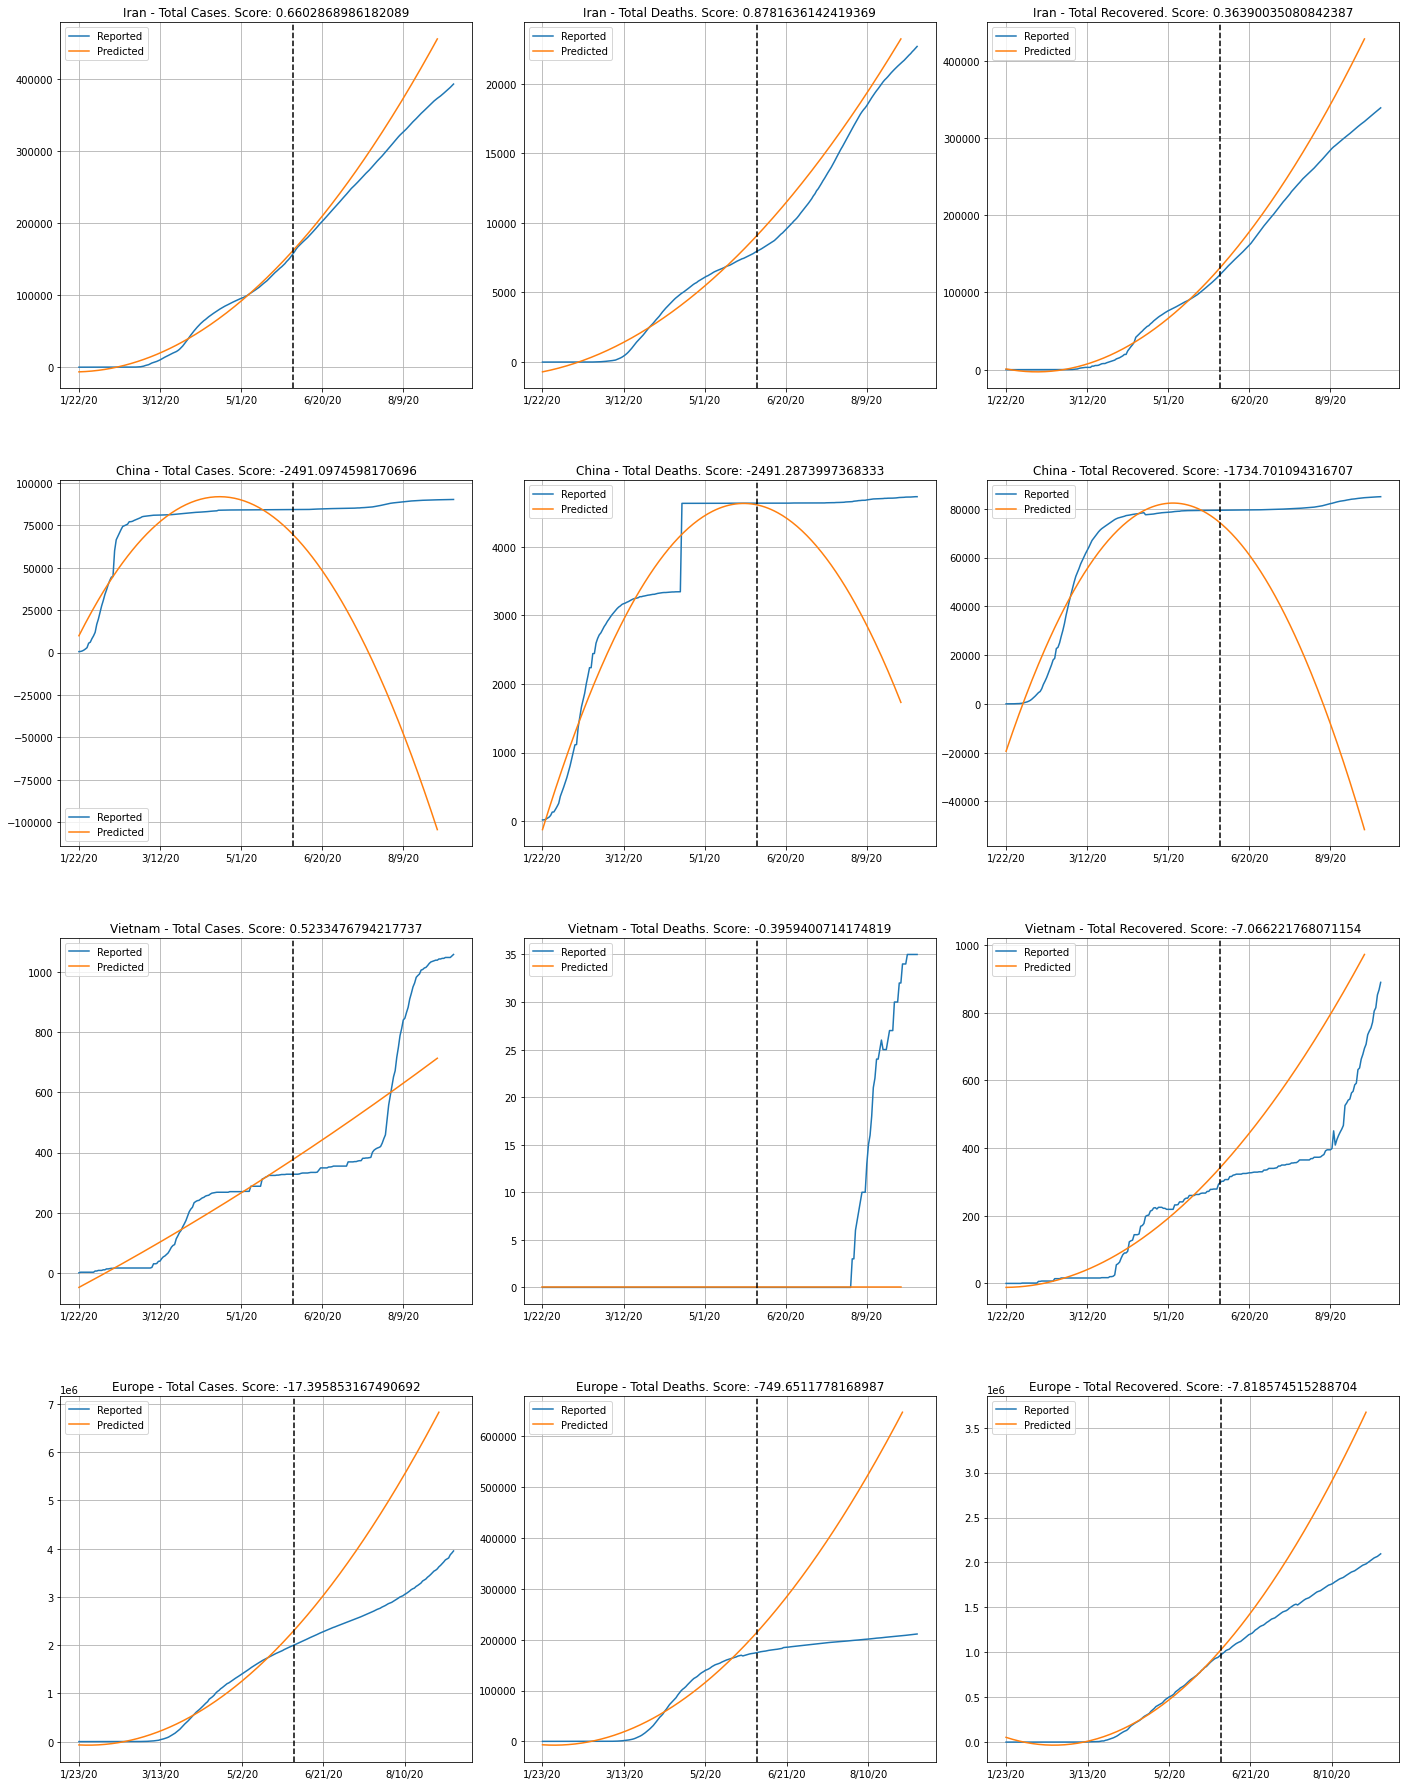

In [ ]:
continent_names = ['North America', 'South America', 'Asia', 'Australia', 'Africa', 'Europe', 'Others']
selected_countries = ['Iran', 'China', 'Vietnam', 'Europe']

n_rows = len(selected_countries)
fig, axes = plt.subplots(n_rows, 3, figsize=(24, n_rows*8))
plt.subplots_adjust(wspace=.125, hspace=.25)

start_date_idx = days_count - 100
end_date_idx = days_count - 10
X = np.arange(0, end_date_idx).reshape(-1, 1)
X_train = np.arange(0, start_date_idx).reshape(-1, 1)
print(X_train.shape)
X_test = np.arange(start_date_idx, end_date_idx).reshape(-1, 1)
print(X_test.shape)

degree = 2

for row_no, country in enumerate(selected_countries):
  for dfi, dfr in enumerate(dfs):
    cur_ax = axes[row_no, dfi]
    
    # serie = dfr[1].loc[row_idx_dict[country][dfi]]
    # serie = get_country_data(df=dfr[1], cname=country, start_date_idx=start_date_idx, end_date_idx=end_date_idx)
    if country in continent_names:
      sum_df = dfr[1].groupby('continent').sum()
      serie = sum_df.loc[country][1:]
      y_train = sum_df.loc[country][1:start_date_idx + 1]
      y_test = sum_df.loc[country][start_date_idx + 1:end_date_idx + 1]
    else:
      serie = dfr[1].loc[country][1:]
      y_train = dfr[1].loc[country][1:start_date_idx + 1]
      y_test = dfr[1].loc[country][start_date_idx + 1:end_date_idx + 1]
    serie.plot(ax=cur_ax, label='Reported')
    # cur_ax.plot(X, serie, label='Reported')
    # cur_ax.set_xticklabels(country_data[1])[start_date_idx:end_date_idx]

    predictor = Pipeline([("polynomial_features", PolynomialFeatures(degree=degree, include_bias=True)), ("linear_regression", LinearRegression())])
    # predictor = make_pipeline(PolynomialFeatures(degree), Ridge())
    # predictor.fit(X=X_train, y=serie[:start_date_idx])
    predictor.fit(X=X_train, y=y_train)
    # predict for all days
    prediction = predictor.predict(X=X)
    # future_prediction_score = predictor.score(X=X_test, y=country_data[start_date_idx:end_date_idx])
    future_prediction_score = predictor.score(X=X_test, y=y_test)
    cur_ax.plot(X, prediction, label='Predicted')
    cur_ax.axvline(x=start_date_idx, ls='--', c='black')

    cur_ax.set_title('{} - {}. Score: {}'.format(country, dfr[0], future_prediction_score))
    cur_ax.legend()
    cur_ax.grid(True)

fig.savefig('d2.png', format='png', pad_inches=0)

In [ ]:
selected_countries = ['Spain', 'Mexico', 'Iran', 'Peru', 'South Africa']

n_rows = len(selected_countries)
fig, axes = plt.subplots(n_rows, 3, figsize=(24, n_rows*8))
plt.subplots_adjust(wspace=.125, hspace=.25)
degree = 5

for row_no, country in enumerate(selected_countries):
  for dfi, dfr in enumerate(dfs):
    cur_ax = axes[row_no, dfi]
    
    serie = dfr[1].loc[row_idx_dict[country][dfi]]
    serie.plot(ax=cur_ax, label='Reported')

    predictor = make_pipeline(PolynomialFeatures(degree), BayesianRidge(fit_intercept=True, compute_score=True))
    predictor.fit(X=X_train, y=serie[:start_day_idx])
    # predict for all days
    prediction = predictor.predict(X=X)
    future_prediction_score = predictor.score(X=X_test, y=serie[start_day_idx:days_count])
    cur_ax.plot(X, prediction, label='Predicted')
    cur_ax.axvline(x=start_day_idx, ls='--', c='black')

    cur_ax.set_title('{} - {}. Score: {}'.format(country, dfr[0], future_prediction_score))
    cur_ax.legend()
    cur_ax.grid(True)

fig.savefig('Mediums_BR_degree5.png', format='png', pad_inches=0)

LSTM

In [ ]:
confirmed_data_df = confirmed_df.iloc[:, 4:] #.append(confirmed_world, ignore_index=True)
print(confirmed_data_df.shape)

deaths_data_df = deaths_df.iloc[:, 4:] #.append(deaths_world, ignore_index=True)
print(deaths_data_df.shape)

recovered_data_df = recovered_df.iloc[:, 4:] #.append(recovered_world, ignore_index=True)
print(recovered_data_df.shape)